In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Friday, January, 01, 2016, 12, 00, 00, AM,.


<IPython.core.display.Javascript object>


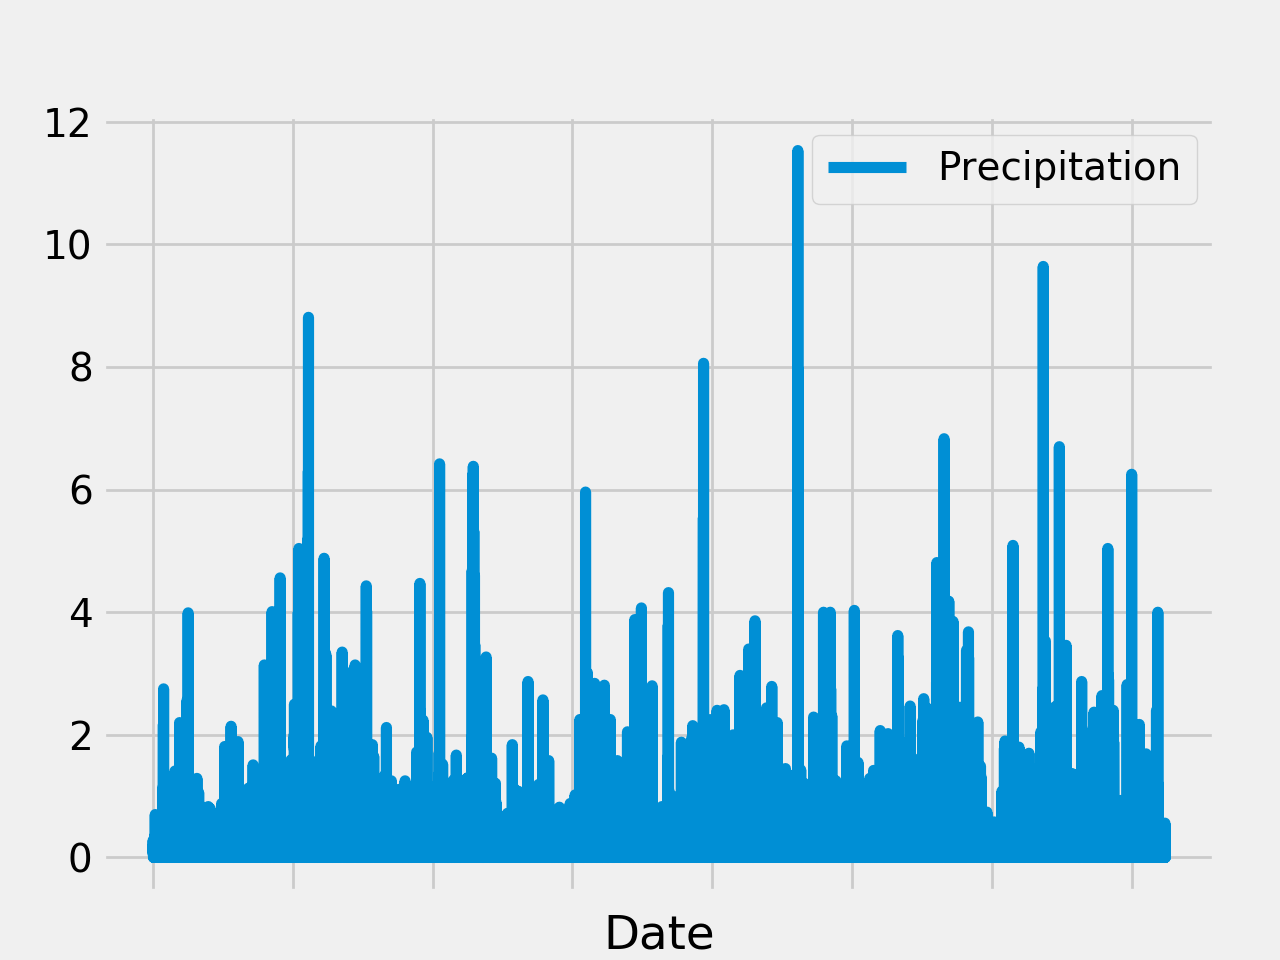

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Data = session.query(
#     Measurement.date,
#     Measurement.prcp).limit(12).all()


Dates = []
Precipitation = []
Data = session.query(Measurement)
for data in Data:
    if data.prcp != None:
        Dates.append(data.date)
        Precipitation.append(data.prcp)
Data = pd.DataFrame({"Date":Dates, "Precipitation":Precipitation})

Data.set_index('Date', inplace=True)

# Calculate the date 1 year ago from today
RightNow = dt.date(2017, 1, 1)
Delta = dt.timedelta(-365.24)
Then = (Delta+RightNow)
Format = "{:%A, %B, %d, %Y, %I, %M, %S, %p,}."
print(Format.format(Then))

# Use Pandas Plotting with Matplotlib to plot the data


# Rotate the xticks for the dates
Data.sort_values(by='Date', inplace=True)
Data.plot()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Data.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [11]:
# How many stations are available in this dataset?
session.query(Station).count()

9

In [12]:
# What are the most active stations?
# List the stations and the counts in descending order.
Stations = []
# Obsevations = []
Data = session.query(Measurement)
for data in Data:
    Stations.append(data.station)
    
#func.count(Stations)
Stations_dic = {"Stations":Stations}
Stations_df = pd.DataFrame(Stations_dic)
Stations_df["Stations"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: Stations, dtype: int64

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)).filter(
Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


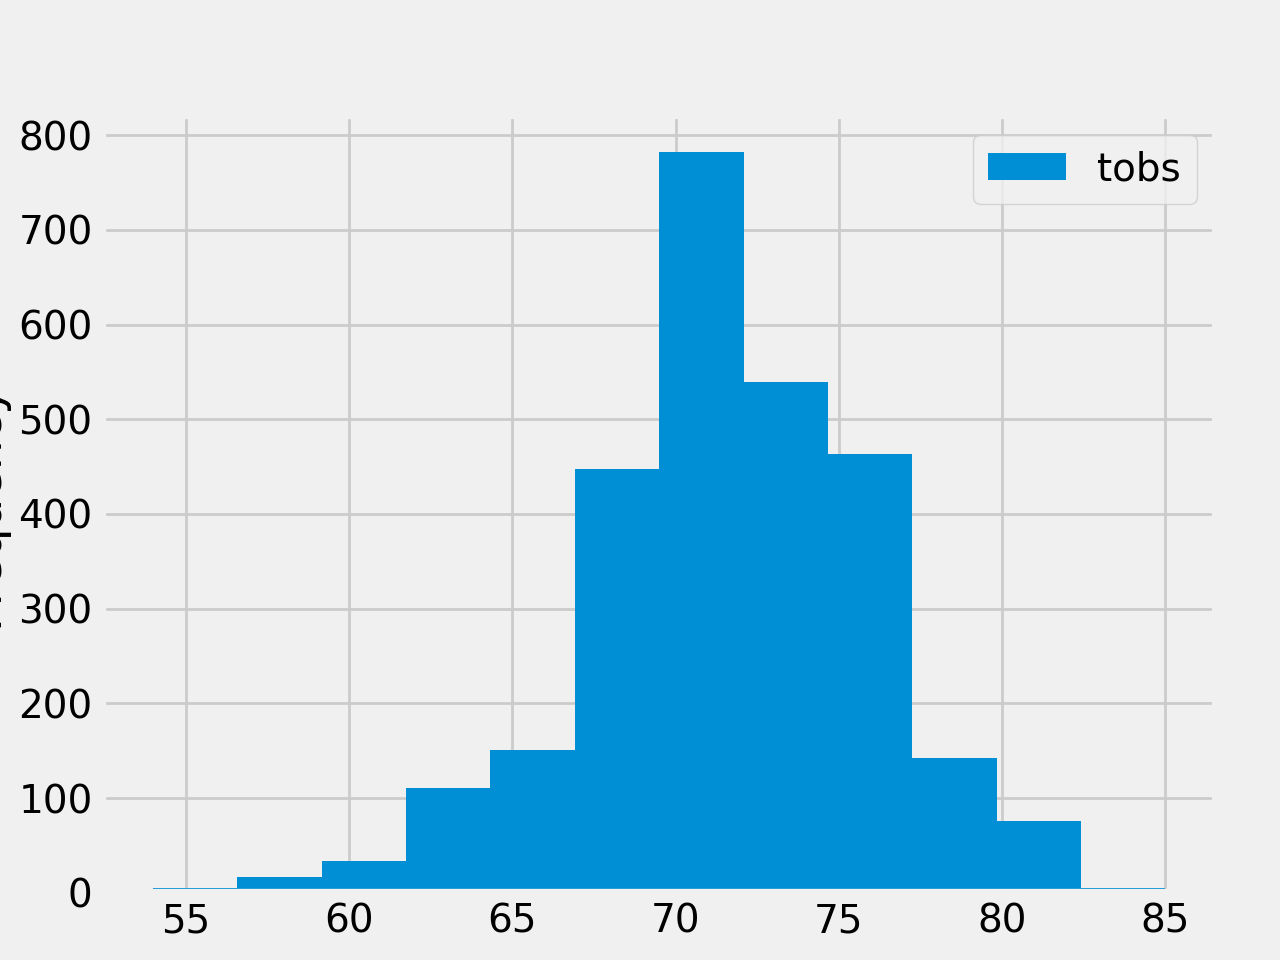

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Station_ls = session.query(
    Measurement.tobs).filter(
Measurement.station == 'USC00519281').all()
Station_df = pd.DataFrame(Station_ls)
Station_df.plot(bins=12, kind='hist')